# Python数据分析第一次作业
根据题目要求，完成对共享单车数据的分析   
数据文件为在压缩包"citibike-tripdata.csv.zip"中，需要自行解压后进行处理。

## 1.读取数据，并显示前10行。（0.5分）

In [41]:
import time
import pandas as pd
bikedata = pd.read_csv('./citibike-tripdata.csv')
bikedata.head(10)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,364,2017-07-01 00:00:00,2017-07-01 00:06:05,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,14744,Subscriber,1986.0,1
1,2142,2017-07-01 00:00:03,2017-07-01 00:35:46,293,Lafayette St & E 8 St,40.730207,-73.991026,3425,2 Ave & E 104 St,40.789210,-73.943708,19587,Subscriber,1981.0,1
2,328,2017-07-01 00:00:08,2017-07-01 00:05:37,3242,Schermerhorn St & Court St,40.691029,-73.991834,3397,Court St & Nelson St,40.676395,-73.998699,27937,Subscriber,1984.0,2
3,2530,2017-07-01 00:00:11,2017-07-01 00:42:22,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,26066,Subscriber,1985.0,1
4,2534,2017-07-01 00:00:15,2017-07-01 00:42:29,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,29408,Subscriber,1982.0,2
5,545,2017-07-01 00:00:18,2017-07-01 00:09:24,361,Allen St & Hester St,40.716059,-73.991908,502,Henry St & Grand St,40.714215,-73.981346,21203,Subscriber,1954.0,2
6,1496,2017-07-01 00:00:18,2017-07-01 00:25:15,3233,E 48 St & 5 Ave,40.757246,-73.978059,546,E 30 St & Park Ave S,40.744449,-73.983035,15933,Customer,1971.0,1
7,1495,2017-07-01 00:00:19,2017-07-01 00:25:15,3233,E 48 St & 5 Ave,40.757246,-73.978059,546,E 30 St & Park Ave S,40.744449,-73.983035,18515,Customer,1964.0,2
8,593,2017-07-01 00:00:27,2017-07-01 00:10:20,3314,W 95 St & Broadway,40.793770,-73.971888,3363,E 102 St & Park Ave,40.790483,-73.950331,29135,Subscriber,1982.0,1
9,1950,2017-07-01 00:00:30,2017-07-01 00:33:00,3085,Roebling St & N 4 St,40.714690,-73.957390,468,Broadway & W 56 St,40.765265,-73.981923,17365,Subscriber,1983.0,1


## 2. 检查每个字段是否有缺失值，统计各字段缺失值比例，并将数值转化为百分比形式，保留两位小数，如9.99%；最后用平均数或众数填充。（0.5分）
(注意填充时一定要符合具体含义)

In [2]:
(bikedata.isnull().sum() / bikedata.shape[0]).map(lambda x: '%.2f%%' % (x*100))

tripduration                0.00%
starttime                   0.00%
stoptime                    0.00%
start station id            0.00%
start station name          0.00%
start station latitude      0.00%
start station longitude     0.00%
end station id              0.00%
end station name            0.00%
end station latitude        0.00%
end station longitude       0.00%
bikeid                      0.00%
usertype                    0.00%
birth year                 13.17%
gender                      0.00%
dtype: object

In [3]:
# 发现只有birth year列有缺失值。考虑到年份的均值没有意义，所以选择用众数填充
bikedata['birth year'] = bikedata['birth year'].fillna(bikedata['birth year'].mode()[0])

## 3. 计算骑行时间(tripduration)字段的基本统计量，包括最大值、最小值、均值、方差及各个四分位数等。（0.5分）

In [4]:
bikedata['tripduration'].describe()

count    1.735599e+06
mean     1.060143e+03
std      9.622457e+03
min      6.100000e+01
25%      3.950000e+02
50%      6.760000e+02
75%      1.183000e+03
max      2.477222e+06
Name: tripduration, dtype: float64

In [5]:
# 计算方差
bikedata['tripduration'].var()

92591672.1349108

## 4. 统计骑行时间大于等于3天的记录个数，并将相应记录从原DataFrame中剔除。（0.5分）
骑行时间(tripduration)字段的单位为秒

In [6]:
bikedata[bikedata['tripduration'] >= 3*24*60*60].shape[0]

235

In [7]:
bikedata = bikedata.drop(bikedata[bikedata['tripduration'] >= 3*24*60*60].index)
bikedata

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,364,2017-07-01 00:00:00,2017-07-01 00:06:05,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,14744,Subscriber,1986.0,1
1,2142,2017-07-01 00:00:03,2017-07-01 00:35:46,293,Lafayette St & E 8 St,40.730207,-73.991026,3425,2 Ave & E 104 St,40.789210,-73.943708,19587,Subscriber,1981.0,1
2,328,2017-07-01 00:00:08,2017-07-01 00:05:37,3242,Schermerhorn St & Court St,40.691029,-73.991834,3397,Court St & Nelson St,40.676395,-73.998699,27937,Subscriber,1984.0,2
3,2530,2017-07-01 00:00:11,2017-07-01 00:42:22,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,26066,Subscriber,1985.0,1
4,2534,2017-07-01 00:00:15,2017-07-01 00:42:29,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,29408,Subscriber,1982.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1735594,560,2017-07-31 23:59:33,2017-08-01 00:08:53,3260,Mercer St & Bleecker St,40.727064,-73.996621,236,St Marks Pl & 2 Ave,40.728419,-73.987140,16126,Subscriber,1990.0,2
1735595,272,2017-07-31 23:59:35,2017-08-01 00:04:08,247,Perry St & Bleecker St,40.735354,-74.004831,434,9 Ave & W 18 St,40.743174,-74.003664,27684,Subscriber,1999.0,1
1735596,1211,2017-07-31 23:59:37,2017-08-01 00:19:49,3303,Butler St & Court St,40.684989,-73.994403,3308,Kane St & Clinton St,40.686176,-73.996453,28402,Subscriber,1975.0,2
1735597,547,2017-07-31 23:59:48,2017-08-01 00:08:56,276,Duane St & Greenwich St,40.717488,-74.010455,127,Barrow St & Hudson St,40.731724,-74.006744,30150,Subscriber,1992.0,1


## 5. 检查站点id和站点name是否一一对应。如果有id相同name不同，或id不同name相同的，将这些记录从数据中剔除。（0.5分）

In [8]:
start_id_name = bikedata[['start station id', 'start station name']].rename(columns={'start station id': 'id', 'start station name': 'name'})
end_id_name = bikedata[['end station id', 'end station name']].rename(columns={'end station id': 'id', 'end station name': 'name'})

# 将起点和终点的(id, name)数据拼接在一起
id_name = pd.concat([start_id_name, end_id_name], ignore_index=True)
id_name

,id,name
0,539,Metropolitan Ave & Bedford Ave
1,293,Lafayette St & E 8 St
2,3242,Schermerhorn St & Court St
3,2002,Wythe Ave & Metropolitan Ave
4,2002,Wythe Ave & Metropolitan Ave
...,...,...
3470723,236,St Marks Pl & 2 Ave
3470724,434,9 Ave & W 18 St
3470725,3308,Kane St & Clinton St
3470726,127,Barrow St & Hudson St


In [9]:
# 分别检查一个id最多对应几个不同的name、一个name最多对应几个不同的id
print(id_name.groupby('id')['name'].nunique().max())
print(id_name.groupby('name')['id'].nunique().max())
# 发现所有id和name都是一一对应的

1
1


## 6. 根据bikeid字段统计在数据中有多少辆不同的自行车。（0.5分）

In [10]:
bikedata['bikeid'].nunique()

10422

## 7. 统计每辆自行车的骑行次数、总骑行时间、平均每次骑行时间、到过（出发或结束）的站点个数。（1.5分）
生成以bikeid为index、指标为columns的DataFrame

In [11]:
bike_groupby = bikedata.groupby('bikeid')  # 先生成groupby对象，避免计算每个统计值时都重复groupby一遍
res = pd.DataFrame({
    'frequency': bike_groupby.size(),
    'total time': bike_groupby['tripduration'].sum(),
    'mean time': bike_groupby['tripduration'].mean(),
    'num of start stations': bike_groupby['start station id'].nunique(),
    'num of end stations': bike_groupby['end station id'].nunique(),
})

# 如果将出发站点和结束站点算在一起统计
start_stations = bikedata[['bikeid', 'start station id']].rename(columns={'start station id': 'station id'})
end_stations = bikedata[['bikeid', 'end station id']].rename(columns={'end station id': 'station id'})
stations = pd.concat([start_stations, end_stations])
res['num of stations'] = stations.groupby('bikeid')['station id'].nunique()
res

,frequency,total time,mean time,num of start stations,num of end stations,num of stations
bikeid,,,,,,
14529,104,201587,1938.336538,81,80,84
14530,153,110876,724.679739,121,124,128
14531,180,163721,909.561111,141,140,144
14532,58,73186,1261.827586,51,51,54
14533,195,173172,888.061538,148,150,153
...,...,...,...,...,...,...
30333,35,49890,1425.428571,30,30,30
30334,37,51598,1394.540541,35,35,36
30335,46,37499,815.195652,42,41,43


In [45]:
res.loc[14744, :]

frequency                   184.000000
total time               202960.000000
mean time                  1103.043478
num of start stations       132.000000
num of end stations         133.000000
num of stations             137.000000
Name: 14744, dtype: float64

## 8. 统计出发站点、结束站点的个数，并考察两类站点的集合是否相等。（1分）

In [13]:
# 出发站点的个数
print(bikedata['start station id'].nunique())

# 结束站点的个数
print(bikedata['end station id'].nunique())

# 出发站点和结束站点的个数都不同，所以两类站点的集合肯定不相等。验证如下：
set(bikedata['start station id'].tolist()) == set(bikedata['end station id'].tolist())

623
634


False

## 9. 统计以各站点作为起始站点和结束站点的行程数，并找到出发行程最多的前三个站点的id和name，和结束行程最多的前三个站点的id和name。（1分）

In [14]:
# 统计以各站点为出发站点的行程数
station_start_trips = bikedata.groupby(['start station id', 'start station name']).size()
station_start_trips

start station id  start station name                           
72                W 52 St & 11 Ave                                 4019
79                Franklin St & W Broadway                         2927
82                St James Pl & Pearl St                           1320
83                Atlantic Ave & Fort Greene Pl                    1664
116               W 17 St & 8 Ave                                  4026
                                                                   ... 
3472              W 15 St & 10 Ave                                 3767
3474              6 Ave & Spring St                                1934
3476              Norman Ave & Leonard St                           794
3477              39 St & 2 Ave - Citi Bike HQ at Industry City      67
3478              2 Ave & 36 St - Citi Bike HQ at Industry City     285
Length: 623, dtype: int64

In [15]:
# 统计以各站点为结束站点的行程数
station_end_trips = bikedata.groupby(['end station id', 'end station name']).size()
station_end_trips

end station id  end station name                             
72              W 52 St & 11 Ave                                 4023
79              Franklin St & W Broadway                         2935
82              St James Pl & Pearl St                           1335
83              Atlantic Ave & Fort Greene Pl                    1904
116             W 17 St & 8 Ave                                  4068
                                                                 ... 
3472            W 15 St & 10 Ave                                 3865
3474            6 Ave & Spring St                                1961
3476            Norman Ave & Leonard St                           826
3477            39 St & 2 Ave - Citi Bike HQ at Industry City      77
3478            2 Ave & 36 St - Citi Bike HQ at Industry City     277
Length: 634, dtype: int64

In [16]:
# 统计出发行程最多的站点及其出发行程数
station_start_trips.nlargest(3)

start station id  start station name   
519               Pershing Square North    14853
426               West St & Chambers St    14118
514               12 Ave & W 40 St         12263
dtype: int64

In [17]:
# 统计结束行程最多的站点及其结束行程数
station_end_trips.nlargest(3)

end station id  end station name     
426             West St & Chambers St    14795
519             Pershing Square North    14469
514             12 Ave & W 40 St         12690
dtype: int64

## 10. 统计每天7:00-9:00最繁忙（出发和结束行程最多）的3个站点。（1分）
（包括起始行程和结束行程）

In [18]:
# 范围：出发时间在7:00-9:00之间的行程的出发站点 和 结束时间在7:00-9:00之间的行程的结束站点
# 1. 先抽取出出发和结束时间，存入bikedata两个新的列
get_hour_from_time = lambda s: s[11:13]
bikedata['start hour'] = bikedata['starttime'].map(get_hour_from_time)
bikedata['stop hour'] = bikedata['stoptime'].map(get_hour_from_time)

# 2. 抽取出所有起始站点和结束站点的(id, name, hour)记录
start_id_name_hour = bikedata[['start station id', 'start station name', 'start hour']].rename(columns={'start station id': 'id', 'start station name': 'name', 'start hour': 'hour'})
end_id_name_hour = bikedata[['end station id', 'end station name', 'stop hour']].rename(columns={'end station id': 'id', 'end station name': 'name', 'stop hour': 'hour'})
id_name_hour = pd.concat([start_id_name_hour, end_id_name_hour], ignore_index=True)

# 3. 筛选出在时间范围内的记录
id_name_hour = id_name_hour[id_name_hour['hour'].isin(['07', '08'])]

# 4. 找到3个记录数最多的站点
id_name_hour.groupby(['id', 'name']).size().nlargest(3)


id   name                 
519  Pershing Square North    4897
359  E 47 St & Park Ave       3995
426  West St & Chambers St    2939
dtype: int64

## 11. 统计每天17:00-19:00最繁忙的3条（有向）路线。（1分）
（A->B与B->A算作两条不同路线）

In [19]:
# 范围：起始时间和终止时间都在17:00-19:00之间的记录
bikedata_afternoon = bikedata[['start station id', 'start station name', 'end station id', 'end station name', 'start hour', 'stop hour']]
bikedata_afternoon = bikedata_afternoon[bikedata_afternoon['start hour'].isin(['17', '18'])]
bikedata_afternoon = bikedata_afternoon[bikedata_afternoon['stop hour'].isin(['17', '18'])]

# 找到三条最繁忙的路线及出行次数
bikedata_afternoon.groupby(['start station id', 'start station name', 'end station id', 'end station name']).size().nlargest(3)

start station id  start station name     end station id  end station name     
402               Broadway & E 22 St     519             Pershing Square North    157
505               6 Ave & W 33 St        519             Pershing Square North    150
426               West St & Chambers St  514             12 Ave & W 40 St         148
dtype: int64

## 12. 统计usertype的中用户类型个数，并分析每类用户在骑行时长、每天骑行时间段上的差异（1.5分）

In [20]:
# 查看有哪些usertype，以及每种usertype有多少条记录
bikedata['usertype'].value_counts()

Subscriber    1473802
Customer       261562
Name: usertype, dtype: int64

In [21]:
# 分别取出每种usertype对应的记录，展示骑行时长的分布情况
bikedata[bikedata['usertype'] == 'Subscriber']['tripduration'].describe()

count    1.473802e+06
mean     8.196182e+02
std      1.852188e+03
min      6.100000e+01
25%      3.670000e+02
50%      6.030000e+02
75%      1.021000e+03
max      2.575480e+05
Name: tripduration, dtype: float64

In [22]:
bikedata[bikedata['usertype'] == 'Customer']['tripduration'].describe()

count    261562.000000
mean       1808.427623
std        4784.126422
min          61.000000
25%         850.000000
50%        1292.000000
75%        1741.000000
max      258623.000000
Name: tripduration, dtype: float64

<AxesSubplot:ylabel='Frequency'>

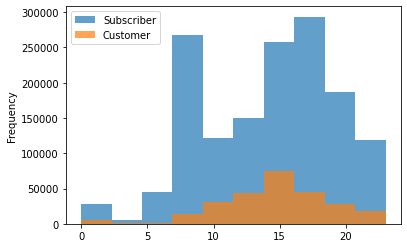

In [23]:
# “分析每类用户每天骑行时间段上的差异”这个问题没有标准答案
# 这里绘制两类用户骑行开始小时和结束小时的频数分布直方图作为抛砖引玉的示例
import matplotlib.pyplot as plt

# 取出两种用户骑行记录开始小时
cus_start = bikedata[bikedata['usertype'] == 'Customer']['start hour'].map(int)
sub_start = bikedata[bikedata['usertype'] == 'Subscriber']['start hour'].map(int)

# 利用pd.DataFrame.plot.hist绘制直方图
hist_start = pd.DataFrame({
    'Subscriber': sub_start,
    'Customer': cus_start
})
hist_start.plot.hist(alpha=0.7)

<AxesSubplot:ylabel='Frequency'>

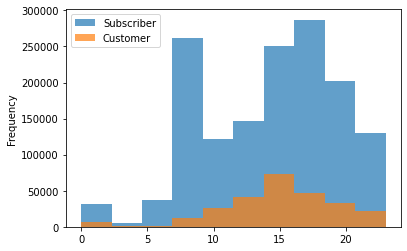

In [24]:
# 结束时间同理
cus_stop = bikedata[bikedata['usertype'] == 'Customer']['stop hour'].map(int)
sub_stop = bikedata[bikedata['usertype'] == 'Subscriber']['stop hour'].map(int)

hist_stop = pd.DataFrame({
    'Subscriber': sub_stop,
    'Customer': cus_stop
})
hist_stop.plot.hist(alpha=0.7)